In [1]:
from plots import *
from PMs import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import pingouin as pg

import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

from sklearn.metrics import accuracy_score
from statistics import mode
from sklearn.metrics import r2_score
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import spearmanr

#from sklearn.model_selection import cross_val_score
pd.set_option("display.max_rows", 100, "display.max_columns", 100) 
np.set_printoptions(precision=2)


In [2]:
ds = pd.read_excel('data/MS_text_XRF_hydr.xlsx')

ds['EC_HP'] = logsdon(50e6, ds.field_realperm, ds.field_imperm)
#print(ds.describe())

#Clean datasets
#df = ds.dropna(subset=['Xlf_IP', 'Clay'])
df = ds.dropna(subset=['Xlf_IP', 'Clay'])
df_xrf = ds.dropna(subset=['Xlf_IP', 'Fe', 'Clay', 'EC_HP', 'MS_field'])

df.describe()

,NUMBER,Duration,Depth,MS_field,Klf_IP,Klf_QP,Ph_F1,Mass,#_y,Rg_F3,Khf_IP,Khf_QP,Ph_F3,Xlf_IP,Xhf_IP,Kfd_abs,Kfd,Xfd_abs,SiO2,SiO2 Error,MgO,MgO Error,Al2O3,Al2O3 Error,Mo,Mo Error,Zr,Zr Error,Sr,Sr Error,U,U Error,Rb,Rb Error,Th,Th Error,Pb,Pb Error,Au,Au Error,Se,Se Error,As,As Error,Hg,Hg Error,Zn,Zn Error,W,W Error,...,Bal Error,Nb,Nb Error,Bi,Bi Error,Re,Re Error,Ta,Ta Error,Hf,Hf Error,Al,Al Error,P,P Error,Si,Si Error,Cl,Cl Error,Mg,Mg Error,Sc,Sc Error,Cs,Cs Error,Te,Te Error,copeky,Archaeology,Bulk_density,copeky_depth,Carbone,Humus,pH_eau,CEC,Clay,Silt_fine,Silt_coarse,Silt,Sand_finr,Sand_coarse,Sand,Battance,CaCO,field_vwc,field_realperm,field_imperm,field_temp,EC1_5,EC_HP
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,5.500000e+01,55.000000,5.500000e+01,5.500000e+01,5.500000e+01,55.000000,5.500000e+01,5.500000e+01,55.0,55.000000,55.0,55.000000,55.0,55.000000,55.000000,55.000000,55.000000,55.00000,55.000000,55.0,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.0,55.000000,55.0,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.0,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.0,55.0,55.0,55.0,55.0,55.0,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.0,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,123.636364,361.195636,83.781818,0.000179,0.000190,0.000008,1.796364,14.884909,443.963636,3.036364,0.000179,5.589093e-07,1.759455,1.325893e-05,1.246049e-05,1.152645e-05,8.238663,7.984425e-07,8.128406e+05,0.0,3400.544545,0.0,105275.426182,0.0,5.682182,1.385273,339.404364,2.838545,88.37400,1.514182,0.0,3.006364,52.487273,1.424545,4.743273,1.293091,14.694182,2.111091,0.0,3.131091,0.0,1.692182,7.683818,2.070909,0.080909,4.022909,34.658364,3.486727,0.0,16.205636,...,1098.811273,7.418909,1.081818,3.271091,1.829636,0.0,1.5,0.0,1.5,0.0,1.5,55701.283818,1157.281818,234.392364,217.892000,379832.057455,1048.438909,5.521091,18.392727,1815.096364,1328.434000,6.980182,14.658909,0.811455,8.871091,0.0,19.178909,20.563636,0.527273,1.561451,83.527273,6.343455,1.239600,7.253273,10.160810,16.241576,12.208203,22.402865,34.611068,35.588189,13.559168,49.147357,1.168896,3.281818,29.219818,22.169091,17.276364,19.678545,0.018087,0.028264
std,125.351559,0.746187,60.963769,0.000248,0.000232,0.000008,6.336947,1.501824,207.778369,0.188919,0.000219,1.950755e-06,3.723411,1.621184e-05,1.529843e-05,1.426443e-05,9.373599,9.886150e-07,1.400768e+05,0.0,2457.824579,0.0,37304.149899,0.0,2.797263,0.126064,155.780290,0.702573,56.09772,0.498367,0.0,0.542932,24.691558,0.357252,2.797838,0.143732,9.216499,0.338831,0.0,0.228032,0.0,0.131328,6.429231,0.362232,0.600038,0.351782,36.967806,0.761981,0.0,1.296119,...,75.111357,4.376775,0.186677,3.178111,0.326434,0.0,0.0,0.0,0.0,0.0,0.0,19737.645560,242.727317,471.437259,311.848182,65456.423031,56.474120,31.544447,2.541130,1680.929766,514.373398,14.403258,10.752702,3.497562,0.888969,0.0,1.080394,18.081875,0.503857,0.165571,61.036071,8.781970,1.753932,1.151838,9.669113,12.377750,8.633779,16.344766,23.544943,20.712381,21.245357,31.798037,1.128989,5.190415,13.996021,12.382228,15.350159,5.871146,0.043474,0.022188
min,1.000000,360.010000,4.000000,0.000000,0.000003,-0.000002,-37.920000,11.980000,65.000000,3.000000,0.000001,-6.072000e-06,-0.790000,1.608132e-07,8.064890e-08,2.030000e-07,2.891030,1.196229e-08,4.877352e+05,0.0,0.000000,0.0,30473.500000,0.0,0.000000,1.090000,43.120000,1.190000,11.11000,0.690000,0.0,1.940000,9.580000,0.740000,0.000000,0.940000,2.330000,1.530000,0.0,2.740000,0.0,1.450000,0.000000,1.450000,0.000000,2.760000,0.000000,2.480000,0.0,14.000000,...,904.680000,0.000000,1.000000,0.000000,1.50000

In [3]:

# Assuming df is your DataFrame and it has columns 'Klf_IP' and 'MS_field'
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# Remove outliers for both columns
#filtered_df = remove_outliers(df, 'Klf_IP')
#filtered_df = remove_outliers(filtered_df, 'MS_field')

# Optionally, you can plot the filtered data
#import matplotlib.pyplot as plt

#plt.scatter(ds['Klf_IP'], ds['MS_field'])
#plt.xlabel('Klf_IP')
#plt.ylabel('MS_field')
#plt.title('Klf_IP vs MS_field (without outliers)')
#plt.show()

#filtered_df.describe()
#df = filtered_df

c:\Users\mendo\anaconda3_2\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


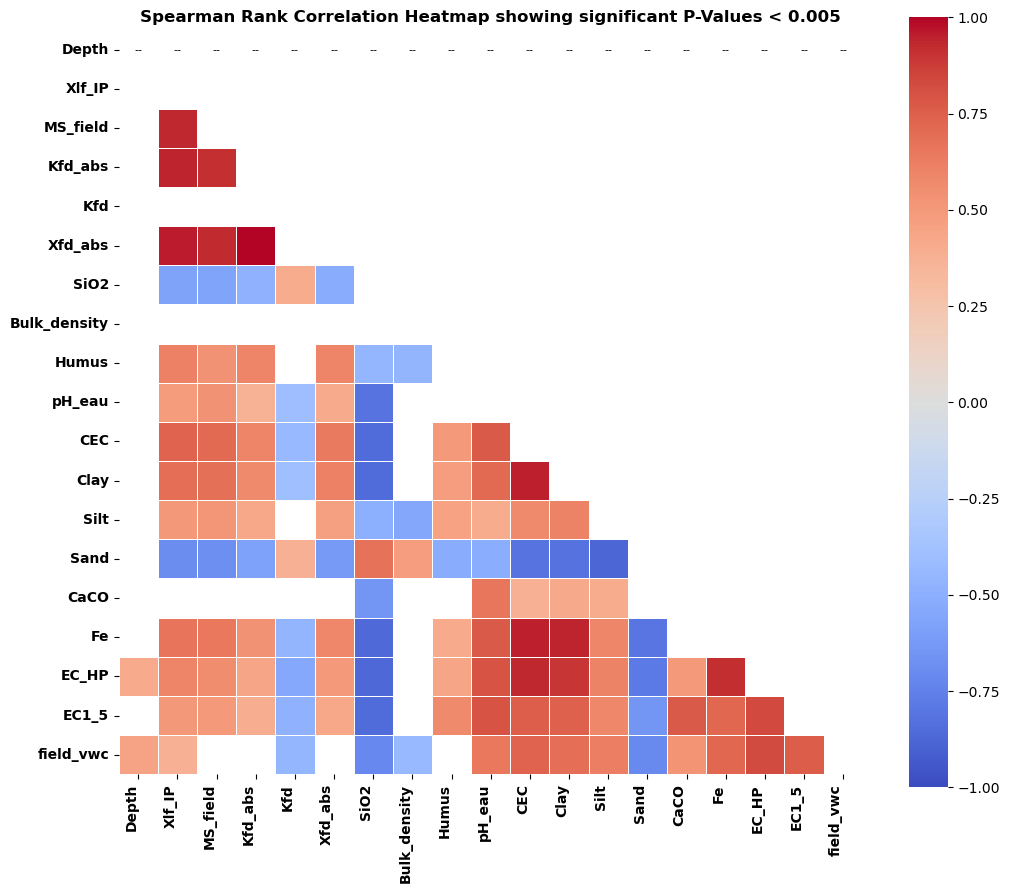

In [4]:
# Define the filtered features
filtered_features = ['Depth', 'Xlf_IP', 'MS_field', 'Kfd_abs', 'Kfd', 'Xfd_abs', 'SiO2', 'Bulk_density', 
                     'Humus', 'pH_eau', 'CEC', 'Clay', 'Silt', 'Sand', 'CaCO', 'Fe', 'EC_HP', 'EC1_5', 'field_vwc']

# Drop rows with NaN values in the filtered features to handle NaNs
df_filtered = df_xrf[filtered_features].dropna()

# Calculate the Spearman rank correlation coefficients and p-values
corr, p_value = spearmanr(df_filtered, nan_policy='omit')

# Convert to DataFrame for easier plotting
corr_df = pd.DataFrame(corr, index=filtered_features, columns=filtered_features)
p_value_df = pd.DataFrame(p_value, index=filtered_features, columns=filtered_features)

# Create a mask for significant p-values (e.g., p < 0.005)
p_value_mask = 0.005
significant_mask = p_value_df < p_value_mask

# Mask for the upper triangle
mask = np.triu(np.ones_like(corr_df, dtype=bool))

# Combine the masks
final_mask = mask | ~significant_mask

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=final_mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, vmin=-1, vmax=1, annot_kws={"size": 8, "color": "black"})

# Adjust layout for better readability
plt.xticks(rotation=90, ha='right', fontsize=10, fontweight='bold')
plt.yticks(rotation=0, fontsize=10, fontweight='bold')
plt.title('Spearman Rank Correlation Heatmap showing significant P-Values < ' + str(p_value_mask), fontsize=12, fontweight='bold')

# Save the plot
folder_path = 'figures_output/'
filename = "Corr_Hysteresis.png"
plt.savefig(folder_path + filename)

# Show the plot
plt.show()

c:\Users\mendo\anaconda3_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mendo\anaconda3_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mendo\anaconda3_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mendo\anaconda3_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

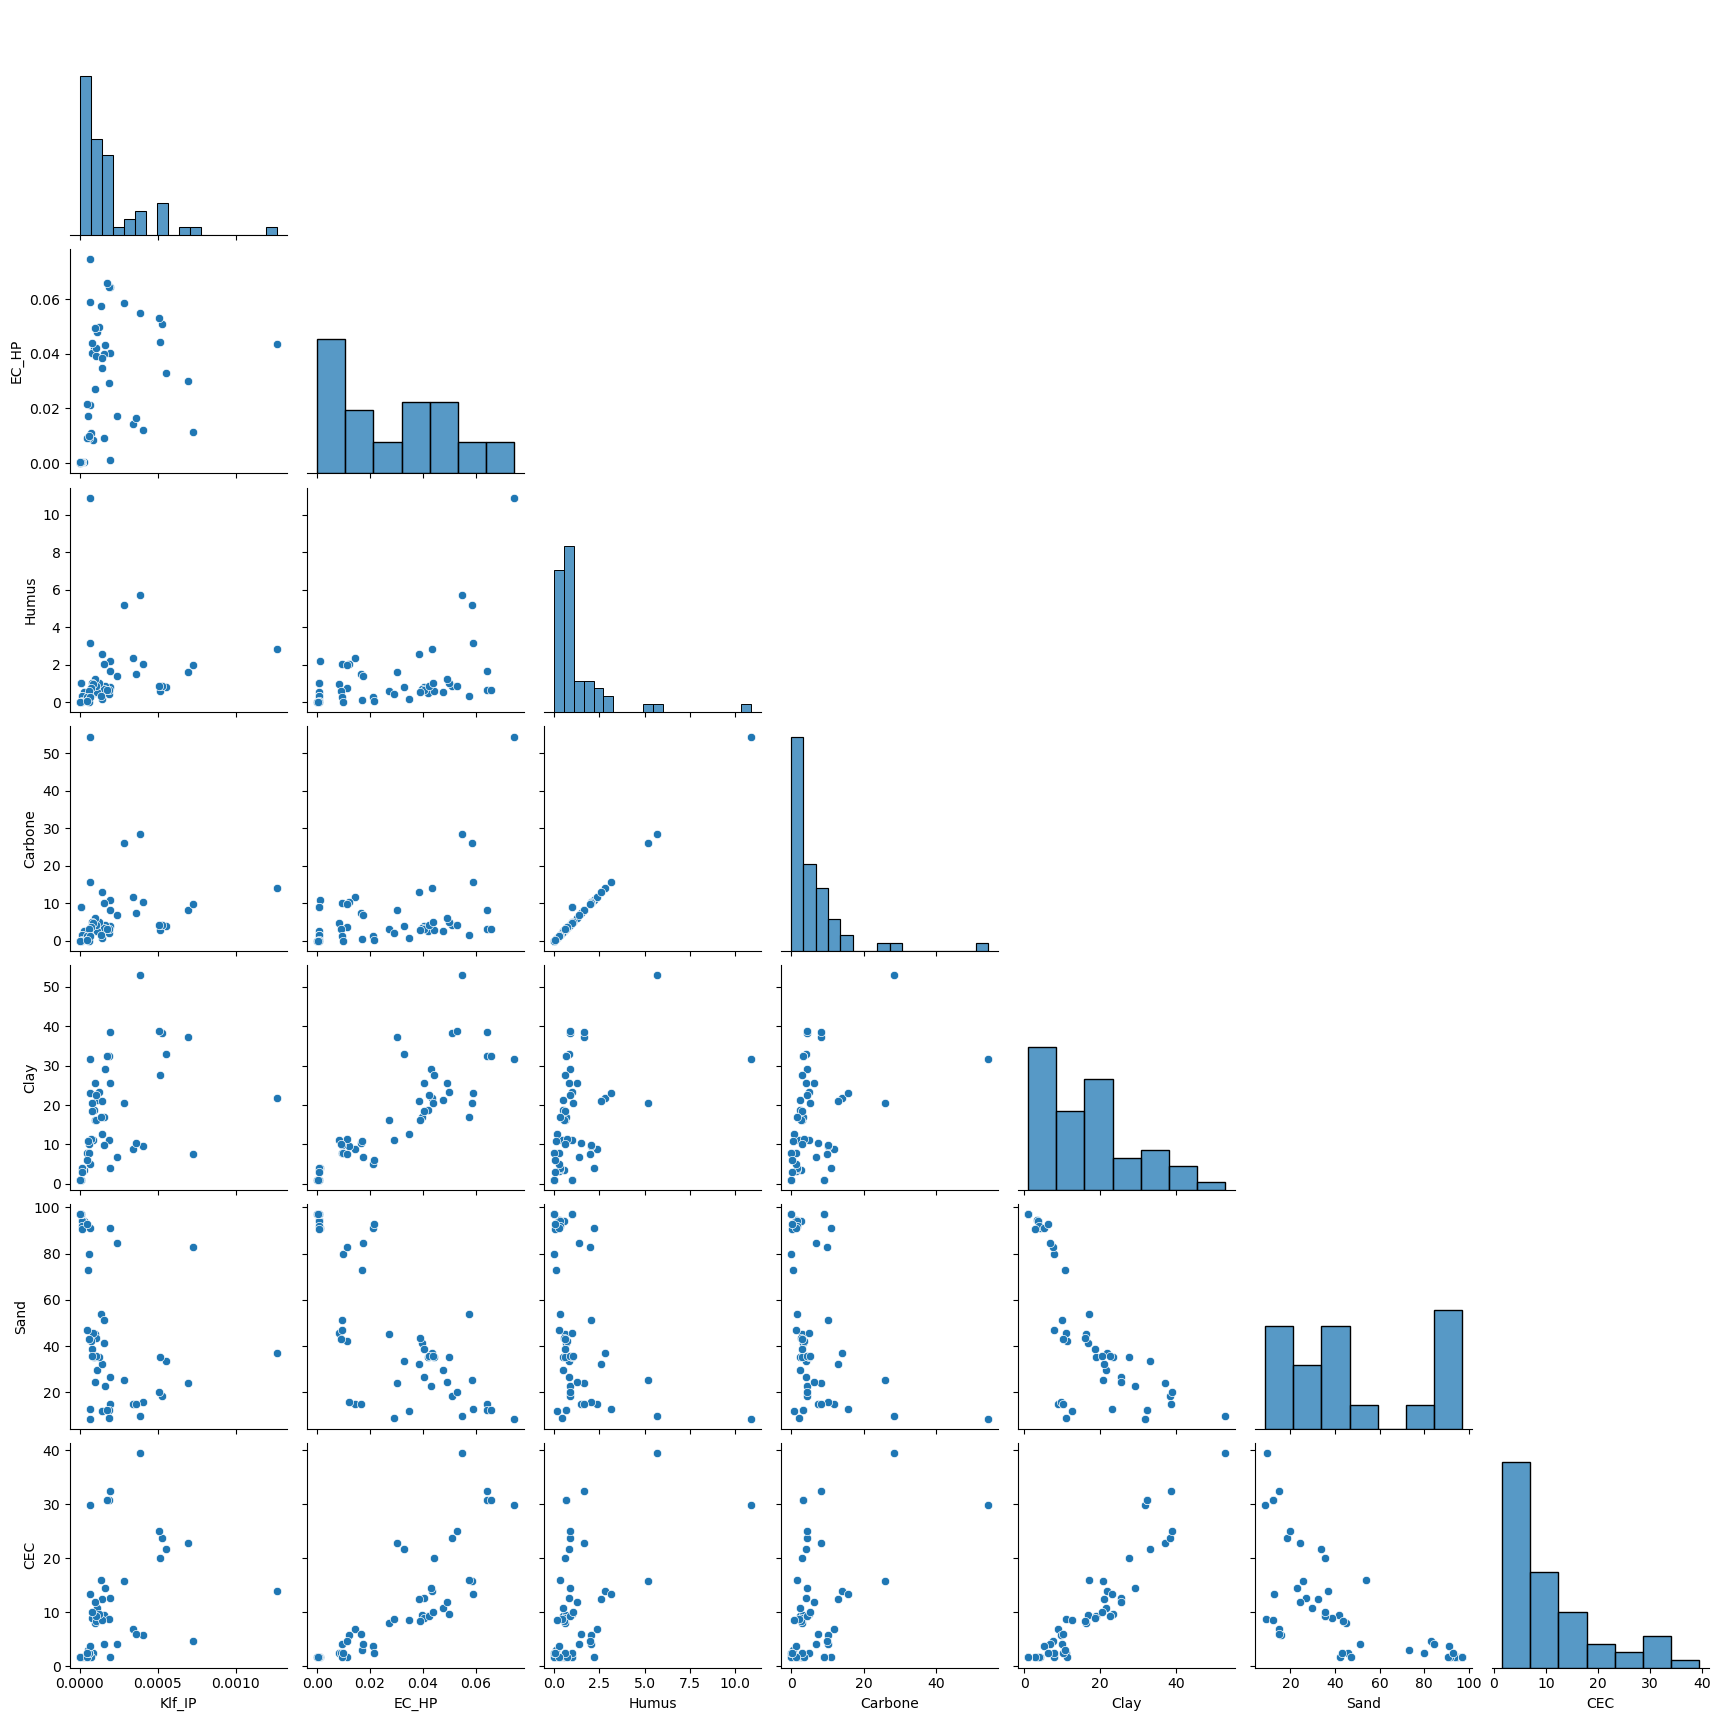

In [5]:
g = sns.pairplot(df.loc[:,['Klf_IP', 'EC_HP', 'Humus', 'Carbone', 'Clay', 'Sand', 'CEC']], 
                  diag_kws=dict(fill=True), corner=True)
plt.show()

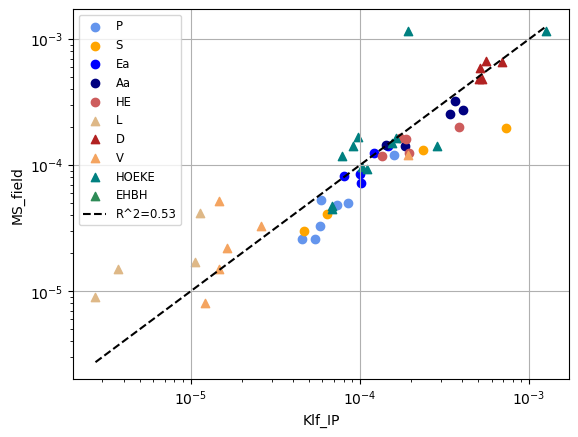

In [6]:
mapping = {
    # "AN": ("black", "o"),
    "P": ("cornflowerblue", "o"),
    "S": ("orange", "o"),
    "Ea": ("blue", "o"),
    "Aa": ("navy", "o"),
    "HE": ("indianred", "o"),
    "L": ("burlywood", "^"),
    "D": ("firebrick", "^"),
    "V": ("sandybrown", "^"),
    "HOEKE": ("teal", "^"),
    "EHBH": ("seagreen", "^"),
}

def plot_sing(df, var1, var2, log_scale=False):
    for start_str, (color, marker) in mapping.items():
        mask = df['SAMPLE'].str.startswith(start_str)
        filtered_df = df[mask]
        plt.scatter(filtered_df[var1], filtered_df[var2], color=color, marker=marker, label=start_str)
        plt.grid(True)

    r2 = r2_score(df[var1], df[var2])
    #plt.text(e-5, 0.2, f'R^2={r2:.2f}')

    # Adding a 1:1 line
    x = np.linspace(min(df[var1]), max(df[var1]), 100)
    plt.plot(x, x, color='black', linestyle='--', label=f'R^2={r2:.2f}' )

    # Setting both axes to logarithmic scale
    if log_scale:
        plt.xscale('log')
        plt.yscale('log')    
        
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend(fontsize='small')  # Adjusting the font size of the legend

    folder_path = 'figures_output/'
    filename = var1+var2+str(log_scale)+".png"
    plt.savefig(folder_path + filename)

plot_sing(df, 'Klf_IP', 'MS_field', log_scale=True)

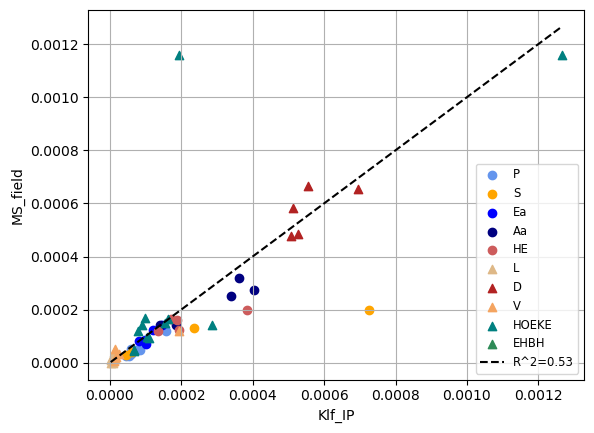

In [7]:
plot_sing(df, 'Klf_IP', 'MS_field')

c:\Users\mendo\OneDrive - UGent\Documentos\PhD\Magnetics\Magnetism_code\plots.py:154: RankWarning: Polyfit may be poorly conditioned
  slope, intercept = np.polyfit(filtered_df[x_col_name], filtered_df[y_col_name], 1)


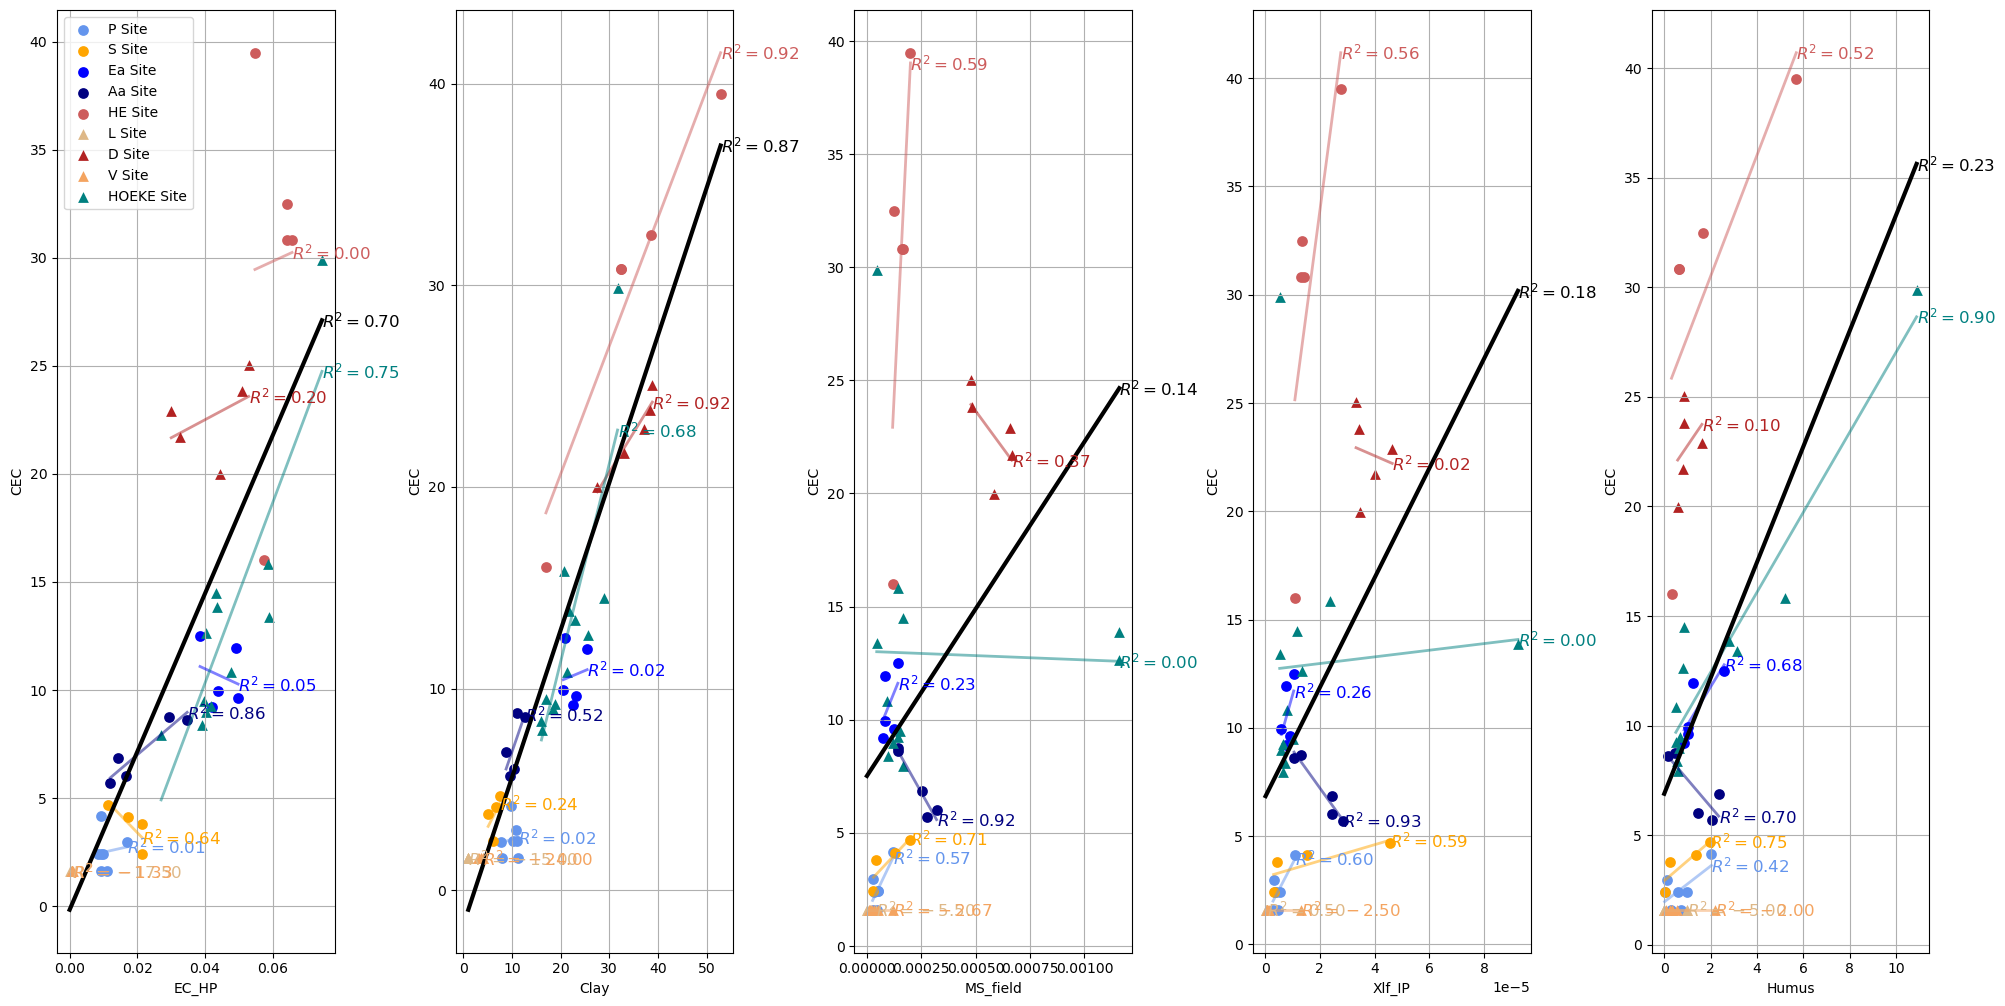

In [8]:
fig, axs = plt.subplots(1, 5, figsize=(20, 10))

# First row plots using df
# Plot scatter and regression lines for EC_HP vs CEC
plot_data1(axs[0], df_xrf, 'EC_HP', 'CEC', mapping, include_label=True)
axs[0].set_xlabel('EC_HP')
axs[0].set_ylabel('CEC')
axs[0].grid(True)

# Plot scatter and regression lines for Clay vs CEC
plot_data1(axs[1], df_xrf, 'Clay', 'CEC', mapping, include_label=False)
axs[1].set_xlabel('Clay')
axs[1].set_ylabel('CEC')
axs[1].grid(True)

# Plot scatter and regression lines for Fe vs CEC
plot_data1(axs[2], df_xrf, 'MS_field', 'CEC', mapping, include_label=False)
axs[2].set_xlabel('MS_field')
axs[2].set_ylabel('CEC')
axs[2].grid(True)

# Plot scatter and regression lines for Xlf_IP vs CEC
plot_data1(axs[3], df_xrf, 'Xlf_IP', 'CEC', mapping, include_label=False)
axs[3].set_xlabel('Xlf_IP')
axs[3].set_ylabel('CEC')
axs[3].grid(True)

# Plot scatter and regression lines for Xlf_IP vs CEC
plot_data1(axs[4], df_xrf, 'Humus', 'CEC', mapping, include_label=False)
axs[4].set_xlabel('Humus')
axs[4].set_ylabel('CEC')
axs[4].grid(True)

plt.tight_layout(pad=.50)  # Reduced padding between subplots
plt.show()

c:\Users\mendo\OneDrive - UGent\Documentos\PhD\Magnetics\Magnetism_code\plots.py:154: RankWarning: Polyfit may be poorly conditioned
  slope, intercept = np.polyfit(filtered_df[x_col_name], filtered_df[y_col_name], 1)


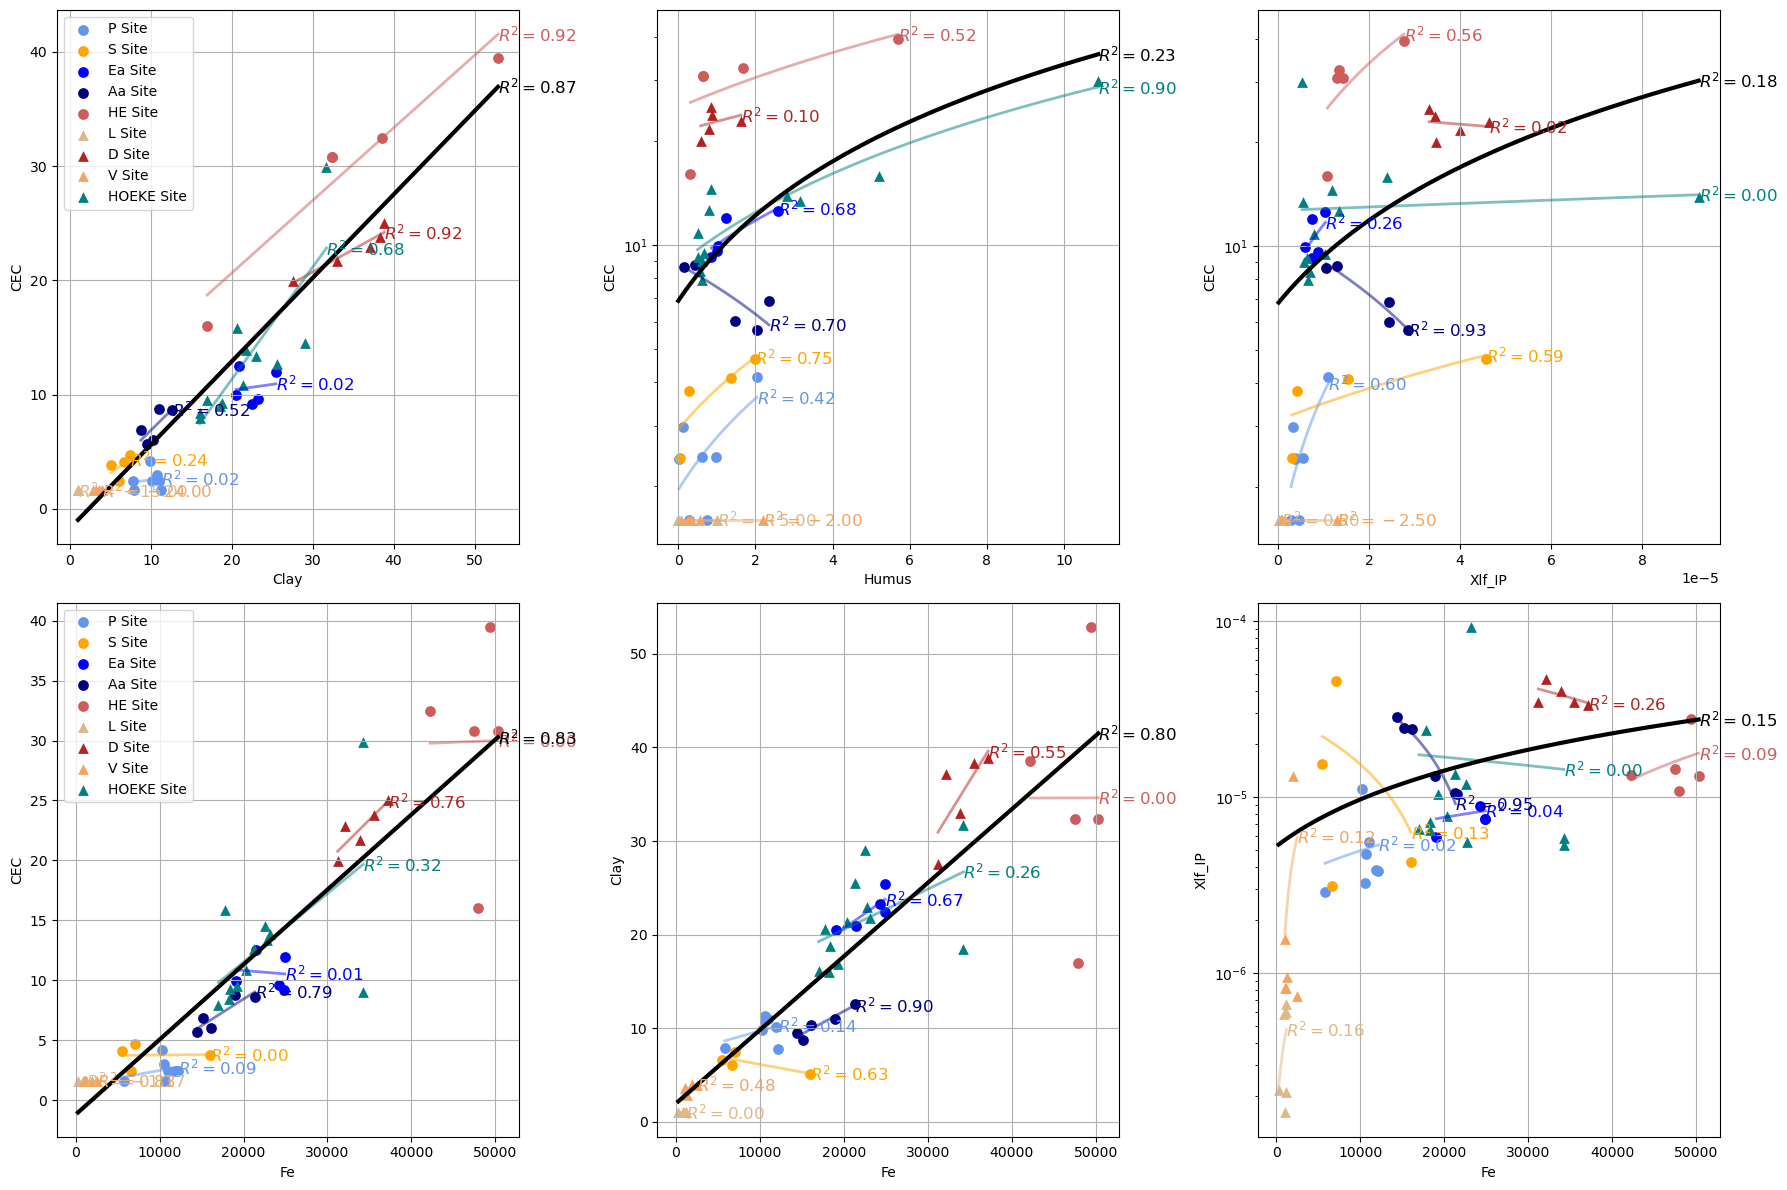

In [9]:
# Extract columns for plotting
x_col_clay = 'Clay'
y_col_cec = 'CEC'
x_col_xlf_ip = 'Xlf_IP'
x_col_ec_hp = 'EC_HP'
x_col_fe = 'Fe'
x_col_humus = 'Humus'

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# First row plots using df
# Plot scatter and regression lines for Clay vs CEC
plot_data1(axs[0, 0], df_xrf, x_col_clay, y_col_cec, mapping, include_label=True)
axs[0, 0].set_xlabel('Clay')
axs[0, 0].set_ylabel('CEC')
axs[0, 0].grid(True)

# Plot scatter and regression lines for Clay vs Xlf_IP
plot_data1(axs[0, 1], df_xrf, x_col_humus, y_col_cec, mapping, include_label=False)
axs[0, 1].set_xlabel('Humus')
axs[0, 1].set_ylabel('CEC')
axs[0, 1].grid(True)
axs[0, 1].set_yscale('log')

# Plot scatter and regression lines for CEC vs Xlf_IP
plot_data1(axs[0, 2], df_xrf, x_col_xlf_ip, y_col_cec, mapping, include_label=False)
axs[0, 2].set_ylabel('CEC')
axs[0, 2].set_xlabel('Xlf_IP')
axs[0, 2].grid(True)
axs[0, 2].set_yscale('log')

# Second row plots using dff
# Plot scatter and regression lines for Clay vs EC_HP
plot_data1(axs[1, 0], df_xrf, x_col_fe, y_col_cec, mapping, include_label=True)
axs[1, 0].set_xlabel('Fe')
axs[1, 0].set_ylabel('CEC')
axs[1, 0].grid(True)

# Plot scatter and regression lines for CEC vs EC_HP
plot_data1(axs[1, 1], df_xrf, x_col_fe, x_col_clay, mapping, include_label=False)
axs[1, 1].set_xlabel('Fe')
axs[1, 1].set_ylabel('Clay')
axs[1, 1].grid(True)

# Plot scatter and regression lines for Xlf_IP vs EC_HP
plot_data1(axs[1, 2], df_xrf, x_col_fe, x_col_xlf_ip, mapping, include_label=False)
axs[1, 2].set_ylabel('Xlf_IP')
axs[1, 2].set_xlabel('Fe')
axs[1, 2].grid(True)
axs[1, 2].set_yscale('log')

plt.tight_layout()
plt.show()

c:\Users\mendo\OneDrive - UGent\Documentos\PhD\Magnetics\Magnetism_code\plots.py:203: RankWarning: Polyfit may be poorly conditioned
  slope, intercept = np.polyfit(df[x_col_name][mask], df[y_col_name][mask], 1)


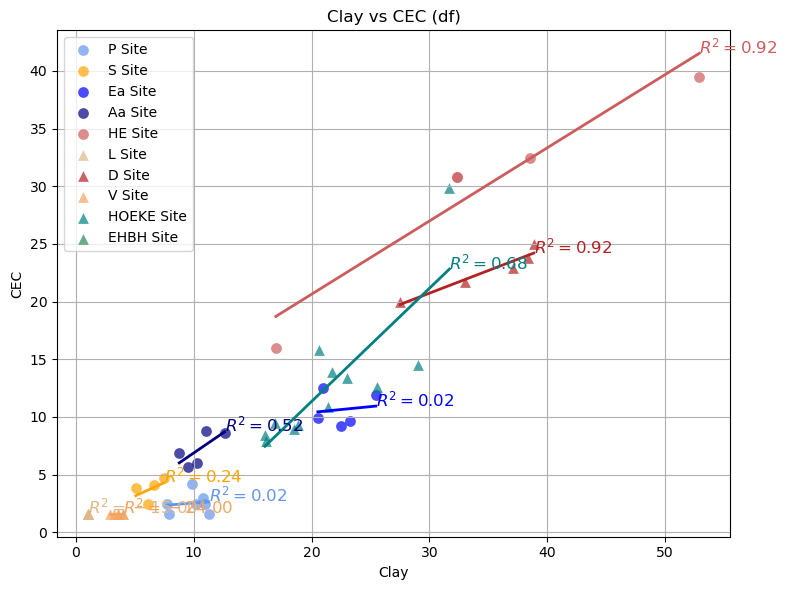

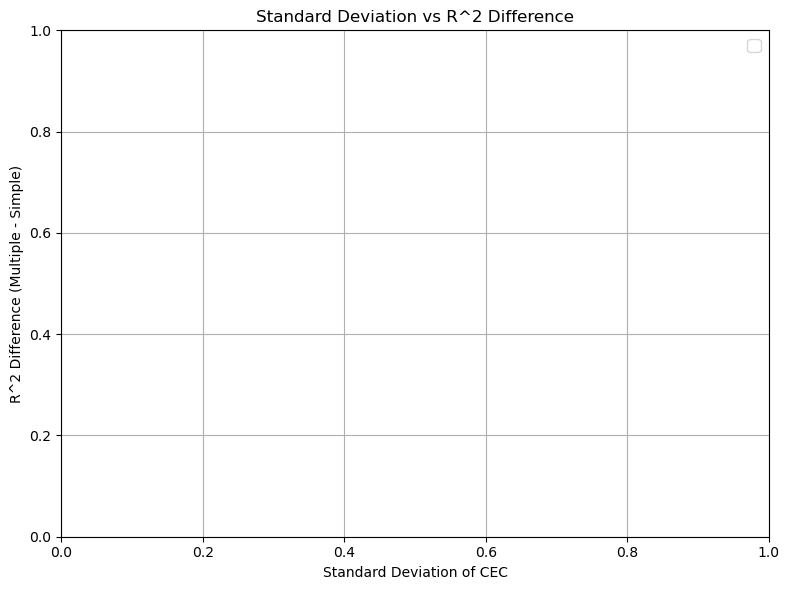

In [10]:
# Extract columns for plotting
x_col_clay = 'Clay'
y_col_cec = 'CEC'

fig, ax = plt.subplots(figsize=(8, 6))

# Plot scatter and regression lines for Clay vs CEC
std_devs, r2_diffs = plot_data2(ax, df, x_col_clay, y_col_cec, mapping, include_label=True)
ax.set_xlabel('Clay')
ax.set_ylabel('CEC')
ax.set_title('Clay vs CEC (df)')
ax.grid(True)

plt.tight_layout()
plt.show()

# Plot standard deviation versus R^2 difference
fig, ax2 = plt.subplots(figsize=(8, 6))
for start_str, (color, marker) in mapping.items():
    for std, r2_diff in zip(std_devs, r2_diffs):
        if start_str in df['SAMPLE'].unique():
            label = f"{start_str} Site" if True else None
            ax2.scatter(std, r2_diff, color=color, s=100, label=label)
            ax2.text(std, r2_diff, start_str, fontsize=12, color=color)

ax2.set_xlabel('Standard Deviation of CEC')
ax2.set_ylabel('R^2 Difference (Multiple - Simple)')
ax2.set_title('Standard Deviation vs R^2 Difference')
ax2.grid(True)

# Add legend
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, fontsize=12)

plt.tight_layout()
plt.show()

TypeError: plot_data2() missing 2 required positional arguments: 'y_col_name' and 'mapping'

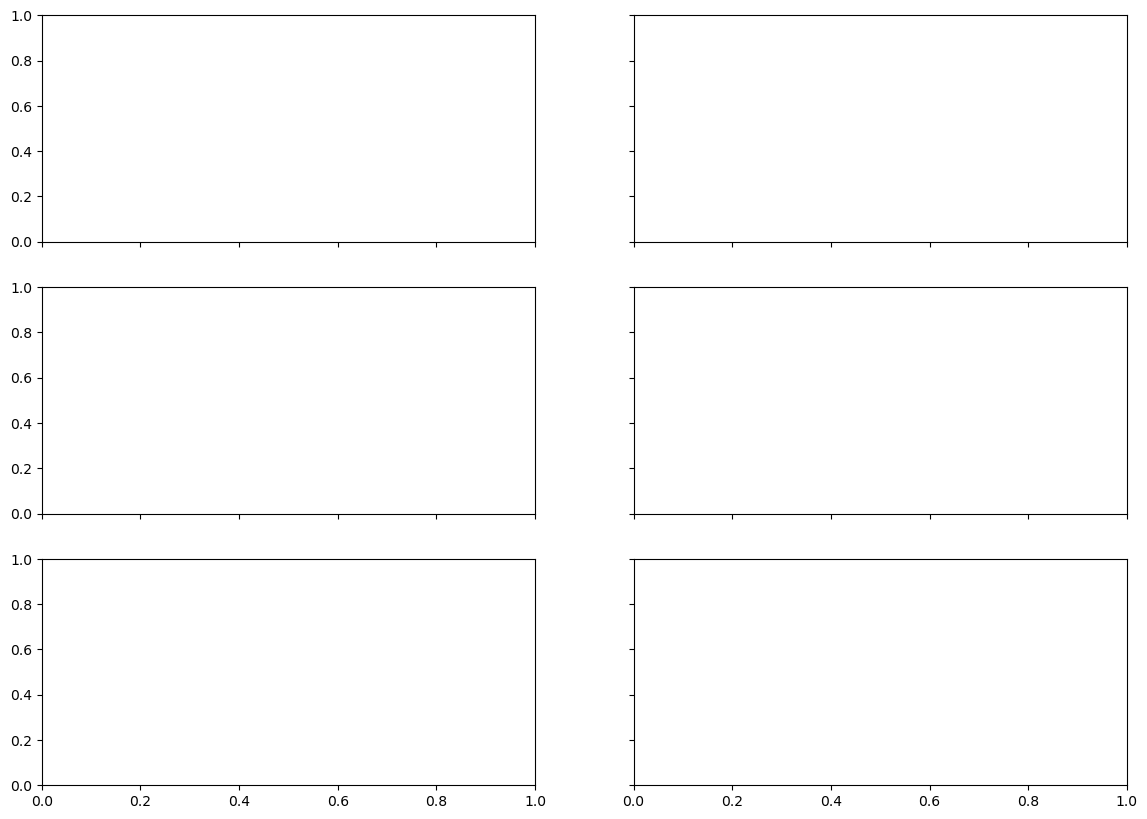

In [14]:
create_and_save_plots2(df_xrf, 'CEC', 'Xlf_IP', 'Clay')

In [ ]:
# Example usage
#create_and_save_plots('Klf_IP', 'Clay', 'CEC')
#create_and_save_plots('Kfd_abs', 'Clay', 'CEC')
#create_and_save_plots('Xlf_IP', 'Clay', 'CEC')

## Linear implementation to predict CEC 
## No train-test


In [ ]:
results_r2 = pd.DataFrame(columns=['Clay_Klf_IP', 'Clay_Kfd'])
results_rmse = pd.DataFrame(columns=['Clay_Klf_IP', 'Clay_Kfd'])

In [ ]:
# Function to perform linear regression and print results
def perform_regression_and_select_best(feature_sets, target, df):
    print('perform_regression_and_select_best:', feature_sets, target)
    best_score = float('-inf')
    best_regressor = None
    best_features = None
    
    for features in feature_sets:
        print(len(df[list(features)].to_numpy()))
        print(len(df[target]))

        reg = LinearRegression().fit(df[list(features)].to_numpy(), df[target])
        predictions = reg.predict(df[list(features)].to_numpy())
        score = reg.score(df[list(features)].to_numpy(), df[target])
        rmse = np.sqrt(np.median((predictions - df[target])**2))

        # Print results for each feature set
        print(f'Feature(s) {features}')
        print(f'RMSE: {rmse:.8f}')
        print(f'Score: {score:.3f}')
        print(f"Coefficients: {reg.coef_}", f"Intercept: {reg.intercept_}\n")
                
        # Update best regressor based on R² score
        if score > best_score:
            best_score = score
            best_regressor = reg
            best_features = features
    
    # Return the best regressor and its features
    return best_regressor, best_features


# Generalize the meshgrid and Z values generation
def generate_meshgrid_and_Z(reg, df, features, n_points=50):
    x_range = np.linspace(df[features[0]].min(), df[features[0]].max(), n_points)
    y_range = np.linspace(df[features[1]].min(), df[features[1]].max(), n_points)
    X, Y = np.meshgrid(x_range, y_range)
    Z = reg.coef_[0] * X + reg.coef_[1] * Y + reg.intercept_
    return X, Y, Z

In [ ]:
# Define feature sets for regressions
#feature_sets_1 = [('Clay',), ('MS_field',), ('Clay', 'Sand'), ('Clay', 'Klf_IP'), ('Clay', 'MS_field'), ('Clay', 'Humus')]

feature_sets_1 = [
    ('Clay',), 
    ('Humus',), 
    ('MS_field',),
    ('EC1_5',),
    ('Humus', 'Khf_IP'), 
    ('Clay', 'Humus'), 
  # ['Clay', 'pH_eau'],
   ('Clay', 'Khf_IP'), 
    ('Clay', 'MS_field'), 
    ('Clay', 'Humus', 'Khf_IP'), 
    ('Clay', 'Sand', 'Humus')]


target_1 = 'CEC'
#feature_sets_2 = [('Clay',), ('Clay', 'CEC'), ('Clay', 'Sand'), ('Clay', 'Humus')]
#target_2 = 'Klf_IP'

# Define your df, feature_sets_1, and feature_sets_2 as before

# Find the best regressor and its features for each target
##best_reg_1, best_features_1 = perform_regression_and_select_best(feature_sets_1, target_1, df)
#best_reg_2, best_features_2 = perform_regression_and_select_best(feature_sets_2, target_2, df)

# Generate meshgrids and Z values for the best regressor of each set
##X1, Y1, Z1 = generate_meshgrid_and_Z(best_reg_1, df, best_features_1)
#X2, Y2, Z2 = generate_meshgrid_and_Z(best_reg_2, df, best_features_2)

# Interactive plots
##def interactive_plot_1(elev=30, azim=30):
##    plot_3d(df, best_features_1[0], best_features_1[1], target_1, X1, Y1, Z1, elev, azim)

#def interactive_plot_2(elev=30, azim=30):
#    plot_3d(df, best_features_2[0], best_features_2[1], target_2, X2, Y2, Z2, elev, azim)

# Display interactive widgets
##display(widgets.interactive(interactive_plot_1, elev=(0, 90, 2), azim=(0, 360, 2)))
#display(widgets.interactive(interactive_plot_2, elev=(0, 90, 2), azim=(0, 360, 2)))
# Here we implemented linear functions to predict soil CEC based on different features. The model development fits the entire dataset.
# With these trhee conditions, adding soil susceptibility to clay is the optimal for CEC prediction.
# Further analysis follows the same problem for non-linear modelling with split of train and test datasets

# Linear implementation to predict CEC for sandy and non-sandy soils

In [ ]:
# Assuming df is your DataFrame
median_humus = df['Humus'].median()
top_soil = df[df['Humus'] > median_humus]
sub_soil = df[df['Humus'] <= median_humus]


# Assuming df is your DataFrame
median_clay = df['Clay'].median()
print(median_clay)
clay_soil = df[df['Clay'] > median_clay]
sandy_soil = df[df['Clay'] <= median_clay]


#best_reg_1, best_features_1 = perform_regression_and_select_best(feature_sets_1, target_1, sandy_soil)
#best_reg_1, best_features_1 = perform_regression_and_select_best(feature_sets_1, target_1, clay_soil)

print('Sandy soils')
##best_reg_1, best_features_1 = perform_regression_and_select_best(feature_sets_1, target_1, sandy_soil)

print('Non-sandy soils')
##best_reg_1, best_features_1 = perform_regression_and_select_best(feature_sets_1, target_1, clay_soil)

In [ ]:
def stochastic_poly(df, feature_columns, Y, n=4, iters=100, round_n=3):
    ypred_train_best, ypred_test_best, R2_train_t_best, R2_test_t_best, RMSE_train_t_best, RMSE_test_t_best = [], [], [], [], [], []
    X = df[feature_columns]

    for i in range(iters):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=i)
        LinReg = LinearRegression()
        ypred_train_, ypred_test_, R2_train_t_, R2_test_t_, RMSE_train_t_, RMSE_test_t_ = [], [], [], [], [], []

        for k in range(n):
            poly = PolynomialFeatures(degree=k)
            poly.fit(X_train)
            Xt_train = poly.transform(X_train)
            Xt_test = poly.transform(X_test)

            LinReg.fit(Xt_train, y_train)
            ypred_train = LinReg.predict(Xt_train)
            ypred_test = LinReg.predict(Xt_test)

            R2_train_t = r2_score(y_train, ypred_train)
            R2_test_t = r2_score(y_test, ypred_test)
            RMSE_train_t = RMSE(y_train, ypred_train)
            RMSE_test_t = RMSE(y_test, ypred_test)

            ypred_train_.append(ypred_train)
            ypred_test_.append(ypred_test)
            R2_train_t_.append(R2_train_t)
            R2_test_t_.append(R2_test_t)
            RMSE_train_t_.append(RMSE_train_t)
            RMSE_test_t_.append(RMSE_test_t)

        ypred_train_best.append(ypred_train_)
        ypred_test_best.append(ypred_test_)
        R2_train_t_best.append(R2_train_t_)
        R2_test_t_best.append(R2_test_t_)
        RMSE_train_t_best.append(RMSE_train_t_)
        RMSE_test_t_best.append(RMSE_test_t_)

    r2_test_n1 = [inner_list[0] for inner_list in R2_test_t_best]
    r2_test_n2 = [inner_list[1] for inner_list in R2_test_t_best]
    r2_test_n3 = [inner_list[2] for inner_list in R2_test_t_best]
    r2_test_n4 = [inner_list[3] for inner_list in R2_test_t_best]
    
    r2_medians = [np.median(r2_test_n1), np.median(r2_test_n2), np.median(r2_test_n3), np.median(r2_test_n4)]
    best_n = r2_medians.index(np.max(r2_medians))
    return best_n, round(np.median([inner_list[best_n] for inner_list in R2_test_t_best]), round_n), round(np.median([inner_list[best_n] for inner_list in R2_train_t_best]), round_n), round(np.median([inner_list[best_n] for inner_list in RMSE_test_t_best]), round_n), round(np.median([inner_list[best_n] for inner_list in RMSE_train_t_best]), round_n)                                             

## CEC prediction with Train-Test for all samples

In [ ]:
feature_sets_CEC = [
    ['Clay'],
    ['Humus'],
    ['MS_field'],
    ['Fe'],
    ['EC1_5'],
    ['Humus', 'Khf_IP'],
    ['Clay', 'Humus'],
    ['Clay', 'Fe'],
    ['Clay', 'Khf_IP'],
    ['Clay', 'MS_field'],
    ['Clay', 'Humus', 'Khf_IP'],
    ['Clay', 'Sand', 'Humus']
]

df_CEC = df['CEC']

test_errors_summary = []
train_errors_summary = []
best_n_ = []

for feature_set in feature_sets_CEC:
    
    best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(df, feature_set, df_CEC, iters=100)
    print('best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set:', best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set)
    best_n_.append(best_n)
    test_errors_summary.append(R2_test_pol)
    train_errors_summary.append(R2_train_pol)

bars_plot(feature_sets_CEC, test_errors_summary, train_errors_summary, 'All samples CEC')

In [ ]:
best_feat_ind = test_errors_summary.index(max(test_errors_summary))
best_feat = feature_sets_CEC[best_feat_ind]
best_feat_n = best_n_[best_feat_ind]
fit_and_plot(df, best_feat, 'CEC', best_feat_n, mapping)

# CEC prediction with Train and Test for Sandy

In [ ]:
# Drop rows with NaN values in the filtered features to handle NaNs
df_filtered = sandy_soil[filtered_features].dropna()

# Calculate the Spearman rank correlation coefficients and p-values
corr, p_value = spearmanr(df_filtered, nan_policy='omit')

# Convert to DataFrame for easier plotting
correlation_matrix = pd.DataFrame(corr, index=filtered_features, columns=filtered_features)

print("Correlation Matrix:\n", correlation_matrix)

# Multiple regression
X = sm.add_constant(sandy_soil[['MS_field', 'Clay']])

# Check VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

In [ ]:
test_errors_summary = []
train_errors_summary = []
best_n_ = []

for feature_set in feature_sets_CEC:
    
    best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(sandy_soil, feature_set, sandy_soil['CEC'], iters=100)
    print('best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set:', best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set)
    test_errors_summary.append(R2_test_pol)
    train_errors_summary.append(R2_train_pol)
    best_n_.append(best_n)

best_feat_ind = test_errors_summary.index(max(test_errors_summary))
best_feat = feature_sets_CEC[best_feat_ind]
best_feat_n = best_n_[best_feat_ind]

bars_plot(feature_sets_CEC, test_errors_summary, train_errors_summary, 'Sandy samples CEC')
print('best_feat_ind, best_feat, best_feat_n', best_feat_ind, best_feat, best_feat_n)

In [ ]:
fit_and_plot(sandy_soil, best_feat, 'CEC', best_feat_n, mapping)

In [ ]:
partial_correlation1(sandy_soil, 'MS_field', 'CEC', 'Clay')
partial_correlation1(sandy_soil, 'MS_field', 'CEC', 'Fe')

# CEC prediction with Train and Test for Clayey

In [ ]:
# Drop rows with NaN values in the filtered features to handle NaNs
df_filtered = clay_soil[filtered_features].dropna()

# Calculate the Spearman rank correlation coefficients and p-values
corr, p_value = spearmanr(df_filtered, nan_policy='omit')

# Convert to DataFrame for easier plotting
correlation_matrix = pd.DataFrame(corr, index=filtered_features, columns=filtered_features)

print("Correlation Matrix:\n", correlation_matrix)

partial_correlation1(clay_soil, 'MS_field', 'CEC', 'Clay')

partial_correlation1(clay_soil, 'MS_field', 'CEC', 'Fe')

# Multiple regression
X = sm.add_constant(clay_soil[['MS_field', 'Clay']])
model = sm.OLS(clay_soil['CEC'], X).fit()
print(model.summary())

# Check VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

In [ ]:
res_plot(clay_soil, 'MS_field', 'CEC', 'Fe')

In [ ]:
test_errors_summary = []
train_errors_summary = []
best_n_ = []

for feature_set in feature_sets_CEC:
    
    best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(clay_soil, feature_set, clay_soil['CEC'], iters=100)
    print('best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set:', best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set)
    test_errors_summary.append(R2_test_pol)
    train_errors_summary.append(R2_train_pol)
    best_n_.append(best_n)

bars_plot(feature_sets_CEC, test_errors_summary, train_errors_summary, 'Clayey samples CEC')

In [ ]:
best_feat_ind = test_errors_summary.index(max(test_errors_summary))
best_feat = feature_sets_CEC[best_feat_ind]
best_feat_n = best_n_[best_feat_ind]
print('best_feat_ind, best_feat, best_feat_n', best_feat_ind, best_feat, best_feat_n)

fit_and_plot(clay_soil, best_feat, 'CEC', best_feat_n, mapping)

## Khf_IP prediction with Train-Test

In [ ]:
feature_sets_Klf = [
    ['Clay'],
    ['Humus'],
    ['Humus', 'CEC'],
    ['Clay', 'Humus'],
  #  ['Clay', 'pH_eau'],
    ['Clay', 'CEC'],
    ['Clay', 'Humus', 'CEC'],
    ['Clay', 'Sand', 'Humus']
]

#df_Klf = df['Khf_IP']
df_Klf = df['MS_field']

test_errors_summary = []
train_errors_summary = []

for feature_set in feature_sets_Klf:
    
    best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(df, feature_set, df_Klf, iters=100)
    print('best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set:', best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set)
    test_errors_summary.append(R2_test_pol)
    train_errors_summary.append(R2_train_pol)

bars_plot(feature_sets_Klf, test_errors_summary, train_errors_summary, 'Non tropical soils Klf IP')

################## Puesta en marcha y plot #################

LinReg_Klf_NTS = LinearRegression()
x = df[['Clay', 'CEC']]
poly = PolynomialFeatures(degree=1)
poly.fit(x)
xt = poly.transform(x)
LinReg_Klf_NTS.fit(xt, df_Klf)
ypred = LinReg_Klf_NTS.predict(xt)
R2 = r2_score(df_Klf, ypred)
RMSE_ = RMSE(df_Klf, ypred)
print('R2', R2)
print('RMSE', RMSE_)

# Create a meshgrid for Clay and Khf_IP
a2 = np.linspace(df.Clay.min(), df.Clay.max(), 50)
b2 = np.linspace(df.Khf_IP.min(), df.Khf_IP.max(), 50)
A2, B2 = np.meshgrid(a2, b2)

print('LinReg_Klf_NTS', LinReg_Klf_NTS.coef_)
# Calculate the Z values for the plane using the meshgrid
Z2 = LinReg_Klf_NTS.coef_[0]*LinReg_Klf_NTS.intercept_ + LinReg_Klf_NTS.coef_[1]*A2 + LinReg_Klf_NTS.coef_[2]*B2 + LinReg_Klf_NTS.intercept_

def interactive_plot(elev=30, azim=30):
    return plot_3d(df, 'Clay', 'CEC', 'Klf_IP', A2, B2, Z2, elev, azim)

widgets.interactive(interactive_plot, elev=(0, 90, 2), azim=(0, 360, 2))
# De aca concluyo que el grado del polinomio puede mejorar el fitting, y que Khf_IP es tan efectivo como Humus para predecir CEC. Esperemos aun las muestras de Polonia.

In [ ]:
x_col_MSfield = 'MS_field'

fig, axs = plt.subplots(1, 3, figsize=(18, 12))

plot_data1(axs[0], df, x_col_MSfield, y_col_cec, mapping, include_label=True)
axs[0].set_xlabel('MS field')
axs[0].set_ylabel('CEC')
axs[0].grid(True)

plt.show()